In [4]:
import pickle
import datetime
from blockchain import blockexplorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter, methodcaller
import math
%matplotlib inline

In [5]:
dbFile = "simple_loop_process.dat"
timeFile = "new_data/times.txt"
timeDiffFile = "new_data/times_diff.txt"
actualTimeFile = "new_data/actual_times.txt"
blockchains = []
times = []
timeDiffs = []
actual_diffs = []
orphans = []
outliers = []

Reads data from the dbFile. This reads in blocks so we can manipulate them. The type of each block is simpleBlock from blockchain explorer.

In [6]:
def readData():
    with open(dbFile,"rb") as f:
        for _ in range(407908):
            try:
                blockchains.append(pickle.load(f))
            except:
                break

Writes the times to a file. Should only need to be done once, but whatever.

In [7]:
def writeTimes():
    with open(timeFile,"w") as f:
        for value in blockchains:
            f.write(str(value.time)+"\n")
            

Reads in the times from the timeFile.

In [8]:
def readTimes():
    global times
    times = [line.rstrip('\n') for line in open(timeFile)]

In [9]:
readData()
blockchains = blockchains[131:]

In [10]:
#check that we read in the blocks
len(blockchains)

401339

In [11]:
###SORT BY HEIGHT
#sorted(blockchains, key=lambda simple_block: student[2])
blockchains = sorted(blockchains, key=attrgetter('height'), reverse=True)
len(blockchains)

401339

In [12]:
def BlockInfo(index):
    print "Height: ",blockchains[index].height
    print "Time: ",blockchains[index].time
    print "Actual Time ",datetime.datetime.fromtimestamp(int(blockchains[index].time)).strftime('%Y-%m-%d %H:%M:%S')
    print "HASH: ",blockchains[index].hash
    print "Main Chain: ",blockchains[index].main_chain

In [13]:
writeTimes()

In [14]:
readTimes()

In [15]:
#check that we read in the times
len(times)

401339

In [16]:
def write_actual_times():
    with open(actualTimeFile,"w") as f:
        for value in blockchains:
            f.write(str(value.height)+" "+datetime.datetime.fromtimestamp(int(value.time)).strftime('%Y-%m-%d %H:%M:%S')+"\n")

In [17]:
#times = times.sort()
write_actual_times()
#blockchains = blockchains2

This is a test block. Allows you to examine the timing and info about block. Ignore this as its lame

In [18]:
#print blockchains[0].time
#print blockchains[0].hash
#print blockchains[0].height
#print "########"
#print blockchains[1].time
#print blockchains[1].hash
#print blockchains[1].height
#print "########"
#print int(blockchains[0].time) - int(blockchains[1].time)
a = datetime.datetime.fromtimestamp(1460972535)
b = datetime.datetime.fromtimestamp(1460972545)
print type(a)
print b
#Mon, 18 Apr 2016 09:42:15 GMT
#Mon, 18 Apr 2016 09:42:25 GMT
#print type(blockchains[0].main_chain )
c =  a - b
print c.total_seconds()
print divmod(c.days * 86400 + c.seconds, 60)

<type 'datetime.datetime'>
2016-04-18 05:42:25
-10.0
(-1, 50)


Function that iterates over the times list and computes the difference between two times next to each other. Writes out to time_diff.txt. Reports the block height, time, and whether in main chain for each block as well as the time between each block. The last digit is seconds between blocks. Sample:
```
407864(1460995794,True) - 407863(1460992454,True)==> 0:55:40 ==>3340.0
```

In [19]:
def processTimes():
    global times
    global timeDiffs
    timeDiffs = []
    counter = 0
    f = open(timeDiffFile,"w")
    for i in range(len(times)):
        if i == len(times)-1:
            break
        #value = int(times[i]) - int(times[i+1])
        value = datetime.datetime.fromtimestamp(int(blockchains[i].time)) - datetime.datetime.fromtimestamp(int(blockchains[i+1].time))
        
        timeDiffs.append(value.total_seconds())
        f.write(str(counter)+": "+str(blockchains[i].height)+"("+str(blockchains[i].time)+","+str(blockchains[i].main_chain)+","+datetime.datetime.fromtimestamp(int(blockchains[i].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+" - "+str(blockchains[i+1].height)+"("+str(blockchains[i+1].time)+","+str(blockchains[i+1].main_chain)+","+datetime.datetime.fromtimestamp(int(blockchains[i+1].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+"==> "+str(value)+" ==>"+str(value.total_seconds())+" secs ==> "+str(value.total_seconds()/60)+" mins\n")
        counter += 1
    f.close()

In [20]:
processTimes()

In [21]:
#test that we have the right data
len(timeDiffs)

401338

In [22]:
timeDiffs[0]

1429.0

Function that converts unix time to human readable times and writes them to a file. Ignore this

In [23]:
def convertTimes():
    global times
    global actual_diffs
    f = open(actualTimeFile,"w")
    for value in times:
        value = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
        f.write(value+"\n")
    for value in timeDiffs:
        value2 = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
        actual_diffs.append(value2)
    f.close()

This converts the data that is negative to positive values

In [24]:
timeDiff_data = []
for value in timeDiffs:
    if value < 0:
        timeDiff_data.append(-1*value)
    else:
        timeDiff_data.append(value)

In [25]:
#import matplotlib.pyplot as plt
def plot_data(seq):
    #plt.plot([1,2,3,4])
    plt.plot(timeDiff_data, seq)
    plt.ylabel('Time between blocks')
    plt.xlabel('Sequence')
    plt.show()

In [26]:
seq = []
for i in range(1,len(timeDiffs)+1):
    seq.append(i)
    
blocks = []
for i in range(len(blockchains)):
    blocks.append(blockchains[i].height)

In [27]:
#plot_data(seq)
timeDiff_data[0]

1429.0

In [28]:
print len(timeDiff_data)
print len(seq)
print len(blocks)
del blocks[-1]

401338
401338
401339


In [29]:
def convertToMin(arr):
    temp = []
    for i in range(len(arr)):
        temp.append(arr[i]/60)
    return temp

In [30]:
del seq[-1]
del timeDiff_data[-1]

In [31]:
del timeDiff_data[-1]

In [32]:
#df = pd.DataFrame({'index':seq,'time':convertToMin(timeDiff_data)})
df = pd.DataFrame({'index':blocks[800:850],'time':convertToMin(timeDiff_data[800:850])})
#df = pd.DataFrame({'time':convertToMin(timeDiff_data[800:850])})

#df = pd.DataFrame({'index':seq[0:50],'time':timeDiff_data[0:50]})
#df = pd.DataFrame({'index':seq[0:50],'time':convertToMin(timeDiff_data[0:50])})
#df = pd.DataFrame({'index':seq[300:400],'time':convertToMin(timeDiff_data[300:400])})
#df = pd.DataFrame({'index':seq[300:400],'time':timeDiff_data[300:400]})
print df.describe()

               index       time
count      50.000000  50.000000
mean   406949.960000   8.075333
std        14.144964   7.659377
min    406926.000000   0.133333
25%    406938.250000   1.791667
50%    406949.500000   5.966667
75%    406961.750000  10.595833
max    406974.000000  34.066667


In [33]:
#my_plot = df.plot(kind='bar')
timeDiff_mins = convertToMin(timeDiff_data)
temp = convertToMin(timeDiff_data[0:50])
print temp[6]

16.2333333333


In [34]:
print df.tail()

     index       time
45  406930   0.650000
46  406929   3.683333
47  406928   0.283333
48  406927  17.266667
49  406926  10.633333


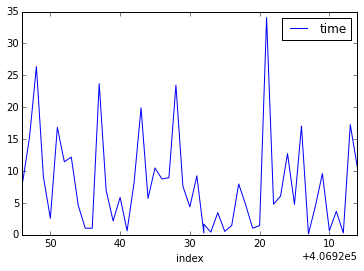

In [35]:
df.plot(kind='line',x='index',y='time')

[]

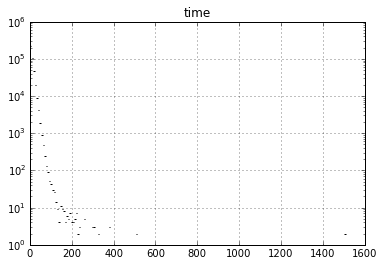

In [36]:
df2 = pd.DataFrame({'time':convertToMin(timeDiff_data)})
#df2.plot(kind='hist',bins=100)
df2.hist(bins=200)
plt.semilogy()

In [37]:
df2.describe()


,time
count,401336.000000
mean,9.801350
std,11.751492
min,0.000000
25%,2.900000
50%,6.800000
75%,13.383333
max,1508.866667


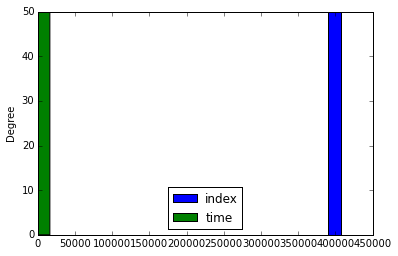

In [38]:
df.plot(kind='hist',bins=25)

In [39]:
def outlier(points,thresh=10):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [40]:
df3 = pd.DataFrame({'index':seq[800-850],'time':timeDiff_data[800:850]})

x = outlier(df3['time'])
len(x)

50

In [41]:
def remove_outliers(df):
    temp = []
    x = outlier(df)
    for i in range(len(df)):
        if x[i] == True:
            print "Removing ",df[i]
        else:
            temp.append(df[i])
    return temp

In [42]:
new  = remove_outliers(df3['time'])

In [43]:
df4 = pd.DataFrame({'time':new})

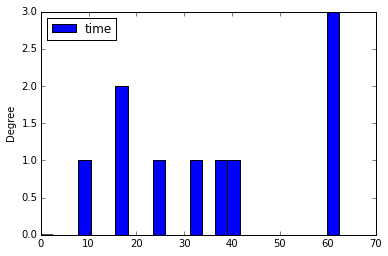

In [44]:
x = df4.plot(kind='hist',bins=25,range=[0, 65])

In [45]:
df4.describe()

,time
count,50.000000
mean,484.520000
std,459.562624
min,8.000000
25%,107.500000
50%,358.000000
75%,635.750000
max,2044.000000


In [46]:
df4.head()

,time
0,486
1,912
2,1583
3,546
4,155


In [47]:
bins = np.linspace(min(df4['time']),max(df4['time']),25)

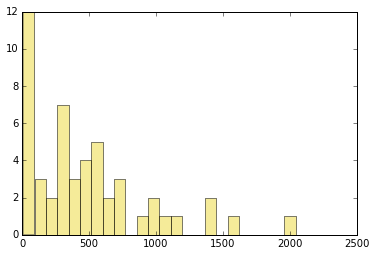

In [48]:
fig, ax = plt.subplots(1,1)
ax.hist(df4['time'],bins=bins,alpha=0.5,color='#EDD834')
#ax.set_xticks(bins[:-1])
plt.show()

In [49]:
def find_orphans():
    global orphans
    global blockchains
    orphans = []
    for i in blockchains:
        if i.main_chain == False:
            orphans.append(i)

In [50]:
len(orphans)

0

In [51]:
find_orphans()

In [52]:
len(orphans)

817

In [53]:
def sell_orphans(chain):
    arr = []
    for i in chain:
        if i.main_chain == True:
            arr.append(i)
    return arr

In [54]:
print len(blockchains)
real_chain = sell_orphans(blockchains)
print len(real_chain)

401339
400522


In [55]:
print orphans[0].time
print orphans[0].hash
print orphans[0].height

1460907019
00000000000000000307fce1866969b24cb465f98bf61519fbcc1f0dc05b0d80
407722


Segregates blocks into two lists, before and after the paper

In [56]:
def segregateBlocks(chain):
    threshold = 1357016625
    before = []
    after = []
    for block in chain:
        if block.time < threshold:
            before.append(block)
        else:
            after.append(block)
    before = sorted(before, key=attrgetter('height'), reverse=True)
    after = sorted(after, key=attrgetter('height'), reverse=True)
    return before,after

In [57]:
def CalcTimes(chain,fname):
    timeDiffs = []
    counter = 0
    f = open(fname,"w")
    for i in range(len(chain)):
        if i == len(chain)-1:
            break
        #value = int(times[i]) - int(times[i+1])
        value = datetime.datetime.fromtimestamp(int(chain[i].time)) - datetime.datetime.fromtimestamp(int(chain[i+1].time))
        
        timeDiffs.append(value.total_seconds())
        f.write(str(counter)+": "+str(chain[i].height)+"("+str(chain[i].time)+","+str(chain[i].main_chain)+","+datetime.datetime.fromtimestamp(int(chain[i].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+" - "+str(chain[i+1].height)+"("+str(chain[i+1].time)+","+str(chain[i+1].main_chain)+","+datetime.datetime.fromtimestamp(int(chain[i+1].time)).strftime('%Y-%m-%d %H:%M:%S')+")"+"==> "+str(value)+" ==>"+str(value.total_seconds())+" secs ==> "+str(value.total_seconds()/60)+" mins\n")
        counter += 1
    f.close()
    return timeDiffs

In [58]:
before,after = segregateBlocks(real_chain)
print len(before)
print len(after)

208133
192389


In [59]:
before_diffs = CalcTimes(before,"new_data/before_diffs.txt")
after_diffs = CalcTimes(after,"new_data/after_diffs.txt")



In [60]:
print len(before_diffs)
print len(before)
del before[-1]
del after[-1]
print len(before)

208132
208133
208132


In [61]:
before_data = []
after_data = []
for value in before_diffs:
    if value < 0.0:
        before_data.append(-1*value)
    else:
        before_data.append(value)
for value in after_diffs:
    if value < 0.0:
        after_data.append(-1*value)
    else:
        after_data.append(value)

In [62]:

before_df = pd.DataFrame({'index':before,'time':convertToMin(before_data)})
#before_df = pd.DataFrame({'time':remove_outliers(before_df['time'])})
after_df = pd.DataFrame({'index':after,'time':convertToMin(after_data)})
print before_df.describe()
print after_df.describe()

                time
count  208132.000000
mean       10.338053
std        21.770765
min         0.000000
25%         3.016667
50%         7.116667
75%        13.916667
max      7719.333333
                time
count  192388.000000
mean        9.288379
std         9.121198
min         0.000000
25%         2.816667
50%         6.516667
75%        12.850000
max       129.016667


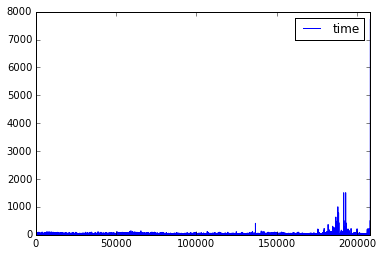

In [63]:
#before_df.plot(kind='line',x='index',y='time')
before_df.plot(kind='line',y='time')

[]

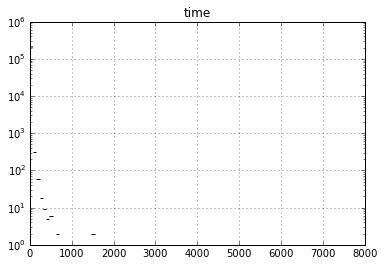

In [64]:
before_df2 = pd.DataFrame({'time':convertToMin(before_data)})
#df2.plot(kind='hist',bins=100)
before_df2.hist(bins=100)
plt.semilogy()

[]

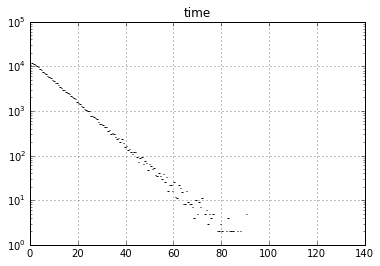

In [65]:
after_df2 = pd.DataFrame({'time':convertToMin(after_data)})
#df2.plot(kind='hist',bins=100)
after_df2.hist(bins=200)
plt.semilogy()

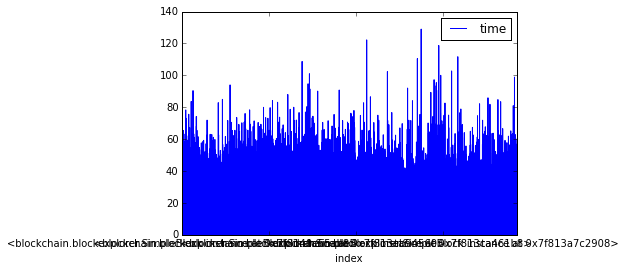

In [66]:
after_df.plot(kind='line',x='index',y='time')

In [96]:
#Takes in a chain and a threshold and returns the percent below that threshold(inclusive)
# chain ==> a timediff chain aka a python list of times in seconds
# threshold ==> a time in seconds so if you want 1 min you use 60
def calculate_thresh_percent(chain,prev_threshold,threshold):
    #print len(chain)
    percent = 0
    temp_val = 0
    for i in chain:
        #if prev_threshold<i <= threshold:
        if 0<i <= threshold:
            temp_val += 1
    #print temp_val
    #print len(chain)
    percent = temp_val / float(len(chain))
    #print percent
    return percent,temp_val

In [97]:
if 4.0 <= 60:
    print True

True


In [98]:
#print calculate_thresh_percent(before_data,60.0)
#print calculate_thresh_percent(after_data,60)

In [99]:
#returns a datafram with thresholds
def calculate_thresholds(chain,max_thresh,inc=1):
    threshs = []
    values = []
    blocks = []
    index = 0
    prev_thresh = 0
    while index <= max_thresh: 
        threshs.append(index)
        per,total = calculate_thresh_percent(chain,prev_thresh,index*60)
        values.append(per*100.00)
        blocks.append(total)
        prev_thresh = index*60
        index +=inc
    return pd.DataFrame({'Thresholds':threshs,"Percentage":values,"NumBlocks":blocks})

In [100]:
thresh = 15
before_percent = calculate_thresholds(before_data,thresh)
after_percent = calculate_thresholds(after_data,thresh)
overall = calculate_thresholds(timeDiff_data,thresh)

In [101]:
len(before_data)
overall

,NumBlocks,Percentage,Thresholds
0,0,0.000000,0
1,34754,8.659577,1
2,70687,17.612923,2
3,103508,25.790859,3
4,132526,33.021209,4
5,159065,39.633873,5
6,182980,45.592720,6
7,204692,51.002651,7
8,224251,55.876124,8
9,242042,60.309068,9


In [102]:
after_percent

,NumBlocks,Percentage,Thresholds
0,0,0.000000,0
1,16939,8.804603,1
2,34817,18.097283,2
3,51016,26.517246,3
4,65519,34.055658,4
5,78767,40.941743,5
6,90607,47.095973,6
7,101146,52.573965,7
8,110571,57.472919,8
9,119211,61.963844,9


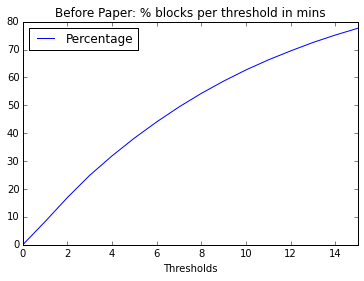

In [103]:
before_percent.plot(kind='line',x='Thresholds',y='Percentage', title ='Before Paper: % blocks per threshold in mins')
#before_percent.plot(kind='line',x='Thresholds',y='NumBlocks')

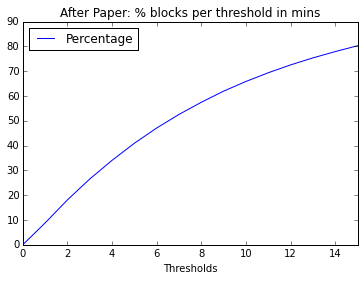

In [104]:
after_percent.plot(kind='line',x='Thresholds',y='Percentage', title ='After Paper: % blocks per threshold in mins')

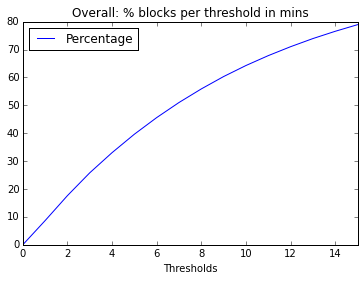

In [105]:
overall.plot(kind='line',x='Thresholds',y='Percentage', title ='Overall: % blocks per threshold in mins')

In [77]:
def calculate_consec(chain,threshold=1):
    marker = int(chain[0])
    tup = [marker,1,[chain[0]]]
    overall = []
    for i in range(1,len(chain)):
        if marker-threshold < int(chain[i])< marker+threshold:
            tup[1] += 1
            tup[2].append(chain[i])
        else:
            if tup[1] > 1:
                overall.append(tup)
            marker = int(chain[i])
            tup = [marker,1,[chain[i]]]
    return overall

In [78]:
consecutives = calculate_consec(convertToMin(before_data))
len(consecutives)
print consecutives[3]

[1, 2, [1.6166666666666667, 1.2]]


In [79]:
consecutives_after = calculate_consec(convertToMin(after_data))
len(consecutives_after)
print consecutives_after[0]

[4, 2, [4.0, 4.283333333333333]]


In [80]:
print consecutives[4]
print before_data[1]

[1, 2, [1.2833333333333334, 1.55]]
571.0


In [180]:
consecutives_all = calculate_consec(convertToMin(timeDiff_data))


In [208]:
len(consecutives_all)

four_min_data = []

for i in consecutives_all:
    if i[0] == 2:
        #four_min_data.append(i[1])
        print i

[2, 2, [2.3833333333333333, 2.433333333333333]]
[2, 3, [2.1, 2.4, 2.1166666666666667]]
[2, 2, [2.8, 2.933333333333333]]
[2, 2, [2.466666666666667, 2.3666666666666667]]
[2, 2, [2.816666666666667, 2.5]]
[2, 2, [2.1333333333333333, 2.65]]
[2, 2, [2.7666666666666666, 2.1333333333333333]]
[2, 2, [2.7333333333333334, 2.7]]
[2, 2, [2.3666666666666667, 2.15]]
[2, 2, [2.966666666666667, 2.3]]
[2, 2, [2.7666666666666666, 2.0]]
[2, 2, [2.533333333333333, 2.55]]
[2, 2, [2.15, 2.6333333333333333]]
[2, 2, [2.2333333333333334, 2.966666666666667]]
[2, 2, [2.3333333333333335, 2.65]]
[2, 2, [2.85, 2.5]]
[2, 2, [2.55, 2.6333333333333333]]
[2, 2, [2.1666666666666665, 2.933333333333333]]
[2, 2, [2.433333333333333, 2.9833333333333334]]
[2, 2, [2.716666666666667, 2.2333333333333334]]
[2, 2, [2.033333333333333, 2.45]]
[2, 2, [2.566666666666667, 2.7333333333333334]]
[2, 2, [2.5833333333333335, 2.15]]
[2, 2, [2.816666666666667, 2.566666666666667]]
[2, 2, [2.783333333333333, 2.1166666666666667]]
[2, 2, [2.25, 2.

In [211]:
max = 0
marker = []
for i in consecutives_all:
    if i[1] > max and i[0]==2:
        max = i[1]
        marker= i
print marker

[2, 4, [2.183333333333333, 2.3, 2.05, 2.1]]


In [81]:
#BEFORE
one_num_blocks = []
two_num_blocks = []
for i in consecutives:
    if i[0] == 1:
        one_num_blocks.append(i[1])
    if i[0] == 2:
        two_num_blocks.append(i[1])
for i in consecutives:
    if i[1] > 2 and i[0] == 1:
        print i
        

[1, 3, [1.3666666666666667, 1.7333333333333334, 1.7166666666666666]]
[1, 3, [1.5666666666666667, 1.3333333333333333, 1.85]]
[1, 3, [1.0166666666666666, 1.05, 1.15]]
[1, 3, [1.2333333333333334, 1.5666666666666667, 1.75]]
[1, 3, [1.8833333333333333, 1.8666666666666667, 1.8833333333333333]]
[1, 3, [1.6333333333333333, 1.5666666666666667, 1.0166666666666666]]
[1, 3, [1.45, 1.6333333333333333, 1.4]]
[1, 3, [1.7, 1.2, 1.2166666666666666]]
[1, 3, [1.85, 1.9666666666666666, 1.0666666666666667]]
[1, 3, [1.1833333333333333, 1.8666666666666667, 1.35]]
[1, 3, [1.6333333333333333, 1.1833333333333333, 1.6833333333333333]]
[1, 3, [1.3166666666666667, 1.9, 1.7]]
[1, 3, [1.3166666666666667, 1.2833333333333334, 1.5166666666666666]]
[1, 3, [1.9833333333333334, 1.65, 1.3833333333333333]]
[1, 3, [1.0333333333333334, 1.6666666666666667, 1.9333333333333333]]
[1, 3, [1.7833333333333334, 1.95, 1.1833333333333333]]
[1, 3, [1.9333333333333333, 1.5666666666666667, 1.9166666666666667]]
[1, 3, [1.15, 1.583333333333

In [224]:
#AFTER
one_num_blocks_after = []
one_num_blocks_after_chains = []
two_num_blocks_after = []
nine_num_blocks_after = []
four_num_blocks= []
for i in consecutives_after:
    if i[0] == 1:
        one_num_blocks_after.append(i[1])
        one_num_blocks_after_chains.append(i[2])
    if i[0] == 2:
        two_num_blocks_after.append(i[1])
    if i[0] == 9:
        nine_num_blocks_after.append(i[1])
for i in consecutives:
    if i[1] > 2 and i[0] == 0:
        print i

        

[0, 4, [0.26666666666666666, 0.8833333333333333, 0.05, 0.0]]
[0, 3, [0.6333333333333333, 0.4166666666666667, 0.26666666666666666]]
[0, 3, [0.9, 0.45, 0.5333333333333333]]
[0, 3, [0.5833333333333334, 0.9833333333333333, 0.8333333333333334]]
[0, 3, [0.4, 0.65, 0.9333333333333333]]
[0, 3, [0.23333333333333334, 0.8, 0.3333333333333333]]
[0, 3, [0.9, 0.43333333333333335, 0.5833333333333334]]
[0, 3, [0.18333333333333332, 0.6, 0.7]]
[0, 3, [0.7, 0.7833333333333333, 0.43333333333333335]]
[0, 3, [0.9166666666666666, 0.7166666666666667, 0.8333333333333334]]
[0, 3, [0.5, 0.3, 0.43333333333333335]]
[0, 3, [0.7, 0.7166666666666667, 0.31666666666666665]]
[0, 4, [0.1, 0.8333333333333334, 0.8333333333333334, 0.7]]
[0, 3, [0.8333333333333334, 0.6833333333333333, 0.26666666666666666]]
[0, 3, [0.9666666666666667, 0.7833333333333333, 0.9833333333333333]]
[0, 3, [0.9166666666666666, 0.8833333333333333, 0.9666666666666667]]
[0, 3, [0.16666666666666666, 0.95, 0.6333333333333333]]
[0, 4, [0.06666666666666667,

In [83]:

for i in range(len(one_num_blocks_after)):
    if one_num_blocks_after[i] == 5:
        print one_num_blocks_after_chains[i]

In [84]:
one_df = pd.DataFrame({"NumBlocks":one_num_blocks})
two_df = pd.DataFrame({"NumBlocks":two_num_blocks})
one_after_df = pd.DataFrame({"NumBlocks":one_num_blocks_after})
two_after_df = pd.DataFrame({"NumBlocks":two_num_blocks_after})
nine_after_df = pd.DataFrame({"NumBlocks": nine_num_blocks_after})

In [150]:
#nine_after_df.hist(bins=10)
len(consecutives)+ len(consecutives_after)

18937

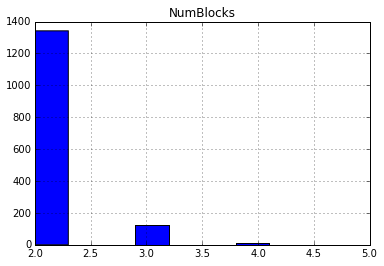

In [86]:
#before
x = one_df.hist(bins=10)
#plt.semilogy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812decc510>]], dtype=object)

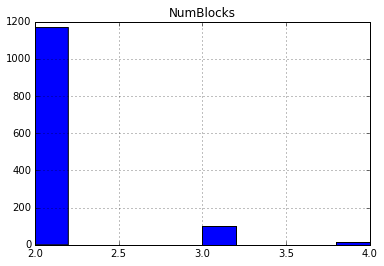

In [87]:
#before
two_df.hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812de46950>]], dtype=object)

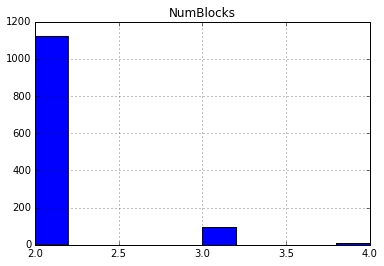

In [88]:
#after
two_after_df.hist(bins=10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f812dd89650>]], dtype=object)

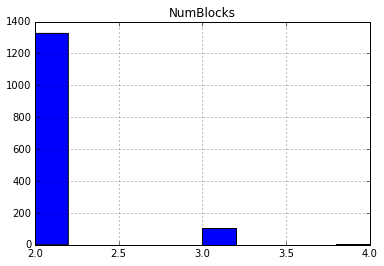

In [89]:
#after
one_after_df.hist(bins=10)
#as a percentage of blocks, different one for each one.


1-((1-x^n)^z)

In [225]:
def prob_distribution(n):
    z = 400000
    x = .15
    temp = math.pow(x,n)
    temp = 1- temp
    temp = math.pow(temp,z)
    return  1-temp

In [226]:
prob_distribution(19)

8.881784197001252e-11

In [227]:
nums = [1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19]
#nums = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
sample = map(prob_distribution, nums)

In [228]:
sample

[1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999357,
 0.9894989071834018,
 0.49512180856191645,
 0.09743596478739724,
 0.015259716399913525,
 0.0023039434217920762,
 0.0003459303666945024,
 7.784764729512617e-06,
 1.1677318955127802e-06,
 1.7514876904378696e-07,
 2.62900808900568e-08,
 3.952393967665557e-09,
 5.773159728050814e-10,
 8.881784197001252e-11]

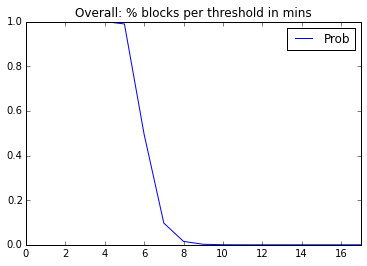

In [229]:
sample_df = pd.DataFrame({"Prob":sample})
sample_df.plot(kind='line',title ='Overall: % blocks per threshold in mins')
#sample_df.plot(kind='line',x='Thresholds',y='Percentage', title ='Overall: % blocks per threshold in mins')